## How to compute SVD?

### **Full SVD**

Let $A \in \mathbb{R}^{m \times n}$ be an arbitrary real matrix with $\text{rank}(A) = r$ (where $r \leq \min(m, n)$).

**Objective:** Find matrices $U \in \mathbb{R}^{m \times m}$, $\Sigma \in \mathbb{R}^{m \times n}$, and $V \in \mathbb{R}^{n \times n}$ such that:
$$
A = U \Sigma V^T
$$
where:
* $U$ and $V$ are orthogonal matrices ($U^TU = I_m$, $V^TV = I_n$).
* $\Sigma$ is a rectangular diagonal matrix with non-negative, non-increasing entries on its main diagonal.

#### **Algorithm:**

1.  **Compute the Gram Matrix:**
    *   Let $G = A^T A$. Then $G \in \mathbb{R}^{n \times n}$ is a symmetric positive semidefinite matrix.

2.  **Spectral Decomposition of $G$:**
    *   Find the eigenvalues $\lambda_i \in \mathbb{R}$ and corresponding orthonormal eigenvectors $\mathbf{v}_i \in \mathbb{R}^n$ of $G$. That is:
        $$
        \forall i \in \{1, \dots, n\}: \quad (A^T A) \mathbf{v}_i = \lambda_i \mathbf{v}_i
        $$
        and
        $$
        \forall i, j: \quad \mathbf{v}_i \cdot \mathbf{v}_j = \mathbf{v}_i^T \mathbf{v}_j = \delta_{ij}
        $$
    *   The eigenvalues are non-negative. Order them such that:
        $$
        \lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_r > \lambda_{r+1} = \dots = \lambda_n = 0
        $$

3.  **Construct the Matrix $V$:**
    *   The matrix $V \in \mathbb{R}^{n \times n}$ is formed by the ordered eigenvectors:
        $$
        V = \begin{bmatrix} \mathbf{v}_1 & \mathbf{v}_2 & \dots & \mathbf{v}_n \end{bmatrix}
        $$
    *   By construction, $V$ is orthogonal: $V^T V = V V^T = I_n$.

4.  **Construct the Matrix $\Sigma$:**
    *   The singular values $\sigma_i$ are defined as $\sigma_i = \sqrt{\lambda_i}$ for $i = 1, \dots, n$.
    *   The matrix $\Sigma \in \mathbb{R}^{m \times n}$ is defined by:
        $$
        \Sigma_{ij} =
        \begin{cases}
        \sigma_i & \text{if } i = j \text{ and } i \leq r \\
        0 & \text{otherwise}
        \end{cases}
        $$
        In block matrix form, if $\hat{\Sigma} = \text{diag}(\sigma_1, \dots, \sigma_r)$, then:
        $$
        \Sigma = \begin{bmatrix}
        \hat{\Sigma} & 0 \\
        0 & 0
        \end{bmatrix} \quad \text{(with zero blocks padded to achieve size $m \times n$)}
        $$

5.  **Construct the Matrix $U$:**

    **Method A (Using A and V):**
    *   For each $i \in \{1, \dots, r\}$, define the $i$-th column of $U$ as:
        $$
        \mathbf{u}_i = \frac{1}{\sigma_i} A \mathbf{v}_i
        $$
        This ensures that $\forall i \in \{1, \dots, r\}: A \mathbf{v}_i = \sigma_i \mathbf{u}_i$. The set $\{\mathbf{u}_1, \dots, \mathbf{u}_r\}$ is an orthonormal basis for the column space of $A$, $\text{Col}(A)$.
    *   Let $S = \text{Span}(\{\mathbf{u}_1, \dots, \mathbf{u}_r\})$. We now need to find an orthonormal basis for the orthogonal complement $S^\perp$, which is the null space of $A^T$, $\text{Null}(A^T)$.
    *   **Apply the Gram-Schmidt process:** Start with any basis for $\mathbb{R}^m$, for example, the standard basis $\{\mathbf{e}_1, \dots, \mathbf{e}_m\}$. Then, for each vector $\mathbf{x}_k$ in this starting set:
        $$
        \mathbf{w}_k = \mathbf{e}_k - \sum_{j=1}^{r} (\mathbf{e}_k \cdot \mathbf{u}_j) \mathbf{u}_j
        $$
        This projects $\mathbf{e}_k$ onto $S^\perp$. After processing all $m$ vectors, you will have a set of $m-r$ non-zero vectors $\{\mathbf{w}_{r+1}, \dots, \mathbf{w}_m\}$ that span $S^\perp$. Orthonormalize them using Gram-Schmidt:
        $$
        \mathbf{u}_{r+1} = \frac{\mathbf{w}_{r+1}}{\|\mathbf{w}_{r+1}\|}, \quad \mathbf{u}_{r+2} = \frac{\mathbf{w}_{r+2} - (\mathbf{w}_{r+2} \cdot \mathbf{u}_{r+1})\mathbf{u}_{r+1}}{\|\mathbf{w}_{r+2} - (\mathbf{w}_{r+2} \cdot \mathbf{u}_{r+1})\mathbf{u}_{r+1}\|}, \quad \text{etc.}
        $$
    *   The matrix $U \in \mathbb{R}^{m \times m}$ is then:
        $$
        U = \begin{bmatrix} \mathbf{u}_1 & \dots & \mathbf{u}_r & \mathbf{u}_{r+1} & \dots & \mathbf{u}_m \end{bmatrix}
        $$
    *   By construction, $U$ is orthogonal: $U^T U = U U^T = I_m$.

    **Method B (Using the Gram Matrix AA^T):**
    *   Compute $H = A A^T \in \mathbb{R}^{m \times m}$.
    *   Find the eigenvalues $\mu_i$ and corresponding orthonormal eigenvectors $\mathbf{u}_i$ of $H$. The non-zero eigenvalues of $H$ are the same as the non-zero eigenvalues of $A^TA$: $\mu_i = \lambda_i$ for $i=1,\dots,r$, and $\mu_{r+1}=\dots=\mu_m=0$.
    *   Order the eigenvectors $\mathbf{u}_i$ such that their corresponding eigenvalues are non-increasing.
    *   The matrix $U \in \mathbb{R}^{m \times m}$ is formed by these ordered eigenvectors:
        $$
        U = \begin{bmatrix} \mathbf{u}_1 & \mathbf{u}_2 & \dots & \mathbf{u}_m \end{bmatrix}
        $$
    *   This directly gives the full, orthogonal matrix $U$.

### **Compact SVD**

The Compact SVD removes the redundant rows and columns associated with zero singular values, providing a more efficient representation without loss of information.

Let $A \in \mathbb{R}^{m \times n}$ with $\text{rank}(A) = r$.

**Objective:** Find matrices $U_r \in \mathbb{R}^{m \times r}$, $\Sigma_r \in \mathbb{R}^{r \times r}$, and $V_r \in \mathbb{R}^{n \times r}$ such that:
$$
A = U_r \Sigma_r V_r^T
$$
where:
* $U_r^T U_r = I_r$
* $V_r^T V_r = I_r$
* $\Sigma_r$ is a diagonal matrix with positive, non-increasing entries.

#### **Algorithm:**

1.  **Follow Steps 1-3 of the Full SVD algorithm** to obtain:
    *   The $r$ positive singular values $\sigma_1 \ge \dots \ge \sigma_r > 0$.
    *   The corresponding orthonormal right singular vectors $\{\mathbf{v}_1, \dots, \mathbf{v}_r\}$.

2.  **Construct the Matrix $V_r$:**
    *   $V_r \in \mathbb{R}^{n \times r}$ is formed by the first $r$ columns of the full matrix $V$:
        $$
        V_r = \begin{bmatrix} \mathbf{v}_1 & \mathbf{v}_2 & \dots & \mathbf{v}_r \end{bmatrix}
        $$
    *   It has orthonormal columns: $V_r^T V_r = I_r$.

3.  **Construct the Matrix $\Sigma_r$:**
    *   $\Sigma_r \in \mathbb{R}^{r \times r}$ is the diagonal matrix of singular values:
        $$
        \Sigma_r = \text{diag}(\sigma_1, \sigma_2, \dots, \sigma_r)
        $$

4.  **Construct the Matrix $U_r$:**

    *   $U_r \in \mathbb{R}^{m \times r}$ is formed using **only** the first $r$ columns from Step 5 of the Full SVD algorithm:
        $$
        \forall i \in \{1, \dots, r\}: \quad \mathbf{u}_i = \frac{1}{\sigma_i} A \mathbf{v}_i
        $$
        $$
        U_r = \begin{bmatrix} \mathbf{u}_1 & \mathbf{u}_2 & \dots & \mathbf{u}_r \end{bmatrix}
        $$
    *   It has orthonormal columns: $U_r^T U_r = I_r$. These columns form a basis for $\text{Col}(A)$. **No Gram-Schmidt is needed here, as the orthonormality is guaranteed by the construction.**


### Implementation and example

Given a matrix $A^{m\times n}$, find a compact singular value.

In [1]:
import numpy as np
from math import sqrt

A = np.array([
    [2, 6],
    [5, 3],
    [-4, 0]
])

In [4]:
def compact_svd(A):
    #Find Gram matrix A^tA
    AtA = A.T@A
    
    #Find eigenvalues and eigenvectors
    evalues, V = np.linalg.eig(AtA)

    #Create S matrix
    S = np.sqrt(np.diag(evalues))

    #Find Ur matrix
    U = np.ndarray((A.shape[0], S.shape[0]))
    for i in range(S.shape[0]):
        U[:, i] = A@V[:, i]/sqrt(evalues[i])
    
    return U, S, V.T

U, S, Vt = compact_svd(A)
print(U)
print(S)
print(Vt)

[[ 0.66666667  0.66666667]
 [ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
[[8.48528137 0.        ]
 [0.         4.24264069]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Compare with numpy implementation

In [3]:
U, S, Vt = np.linalg.svd(A, full_matrices=False) #compact SVD
print(U)
print(S)
print(Vt)

[[-0.66666667  0.66666667]
 [-0.66666667 -0.33333333]
 [ 0.33333333  0.66666667]]
[8.48528137 4.24264069]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Check that matrix A can be reconstructed from $U_r$, $\sum$ and $V^T$

In [5]:
A_r = U @ S @ Vt
print(A_r)

[[ 2.00000000e+00  6.00000000e+00]
 [ 5.00000000e+00  3.00000000e+00]
 [-4.00000000e+00  8.94845727e-17]]


## Applications in Image Reconstruction

Matrix completion, commonly used for filling missing data, can be applied to image and recommendation systems. A well-known example is movie recommendation systems, where a ratings matrix is often only partially filled, as users have not rated every movie. To provide accurate recommendations, we aim to predict these missing ratings.

This task is feasible because user ratings tend to follow patterns, meaning the ratings matrix is often low-rank; only a limited amount of information is needed to approximate it well.

A similar approach applies to images, where pixel values often depend on neighboring pixels, making low-rank approximations effective for reconstructing images with missing or corrupted data.

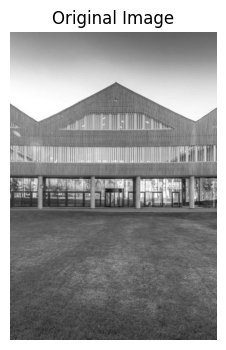

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./sk_campus_img.jpg').convert('L')
img_array = np.array(img)
original_shape = img_array.shape

plt.figure(figsize=(8, 4))
plt.imshow(img_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [7]:
U, S, Vt = np.linalg.svd(img_array, full_matrices=False)  # economy SVD
U.shape, S.shape, Vt.shape

((759, 508), (508,), (508, 508))

In [9]:
def reconstruct_image(k):
    return (U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :])

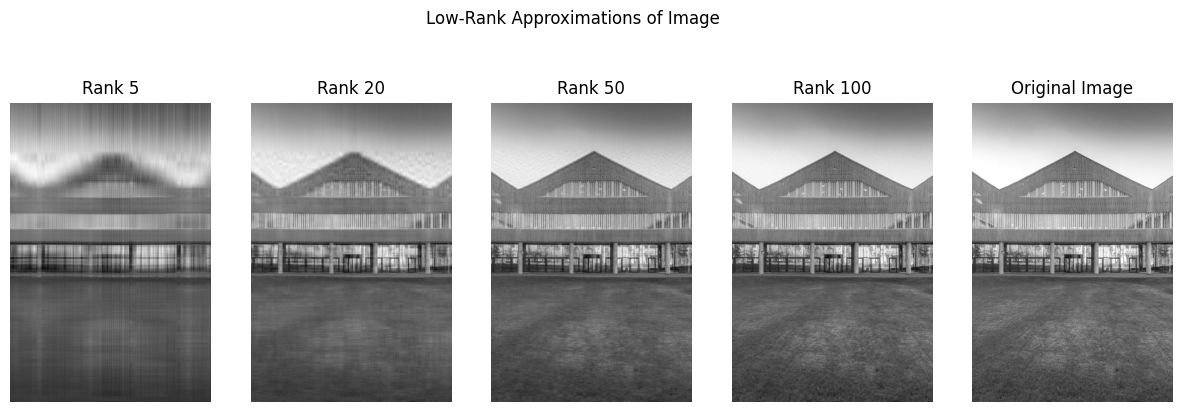

In [10]:
ranks = [5, 20, 50, 100, original_shape[1]]
plt.figure(figsize=(15, 5))

for i, rank in enumerate(ranks, 1):
    plt.subplot(1, len(ranks), i)
    recon_img = reconstruct_image(rank)
    plt.imshow(recon_img, cmap='gray')
    plt.title(f'Rank {rank}') if rank!= original_shape[1] else plt.title(f'Original Image')
    plt.axis('off')

plt.suptitle("Low-Rank Approximations of Image")
plt.show()

## Geometric interpretation



In [11]:
def plot_transformed_circle_and_vectors(A, plot_singular_vectors=False, singular_values=None, singular_vectors=None,
                                        circle_color='black', vector_colors=['blue', 'deeppink'],
                                        singular_vector_colors=['red', 'green'],
                                        singular_labels=[r'$\sigma_1 u_1$', r'$\sigma_2 u_2$'],
                                        label_offset=0.2, xlim=(-8, 8), ylim=(-8, 8)):
    theta = np.linspace(0, 2 * np.pi, 300)
    unit_circle = np.vstack((np.cos(theta), np.sin(theta)))

    transformed_circle = A @ unit_circle

    plt.plot(transformed_circle[0, :], transformed_circle[1, :], color=circle_color, alpha=0.5)

    e1_transformed = A @ np.array([1, 0])
    e2_transformed = A @ np.array([0, 1])

    for i, vec in enumerate([e1_transformed, e2_transformed]):
        color = vector_colors[i]
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=color)

    if plot_singular_vectors and singular_values is not None and singular_vectors is not None:
        for i, (sigma, vec) in enumerate(zip(singular_values, singular_vectors.T)):
            vec_scaled = sigma * vec
            color = singular_vector_colors[i]
            label = singular_labels[i]
            plt.quiver(0, 0, vec_scaled[0], vec_scaled[1], angles='xy', scale_units='xy', scale=1, color=color)
            plt.text(vec_scaled[0] * (1 + label_offset), vec_scaled[1] * (1 + label_offset), label, color=color, fontsize=12)

    plt.axvline(x=0, color='black', lw=1)
    plt.axhline(y=0, color='black', lw=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(xlim)
    plt.ylim(ylim)

Let's transform I matrix, which looks like this:

[[1. 0.]
 [0. 1.]]
Unit circle (before transformation):


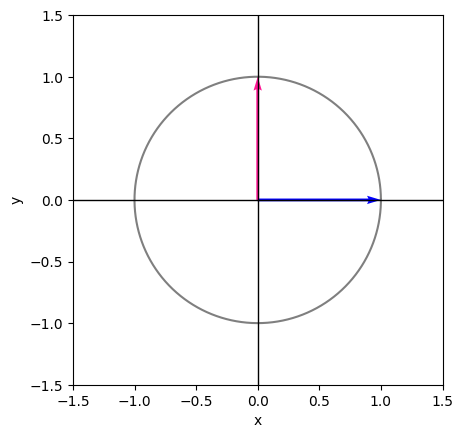

In [14]:
I = np.eye(2)
print(I)

print('Unit circle (before transformation):')
plot_transformed_circle_and_vectors(I, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
plt.show()

Transformation is defined by some matrix A, it is not intuitive.

In [13]:
A = np.array([[1, 3], [4, 5]])
print(A)

[[1 3]
 [4 5]]


But this arbitrary transformation can be decomposed into simple operations using SVD!

In [18]:
U, D, Vt = np.linalg.svd(A)
print(U)
print(D)
print(Vt)

[[-0.42887835 -0.90336225]
 [-0.90336225  0.42887835]]
[7.07251014 0.98974761]
[[-0.57155484 -0.82056387]
 [ 0.82056387 -0.57155484]]


1st rotation by V (right singular vectors):


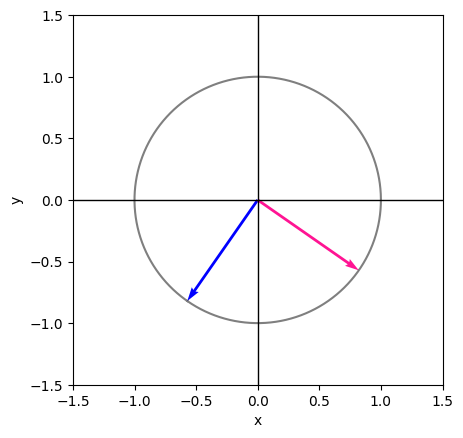

In [16]:
print('1st rotation by V (right singular vectors):')
plot_transformed_circle_and_vectors(Vt.T, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
plt.show()

Scaling by D:


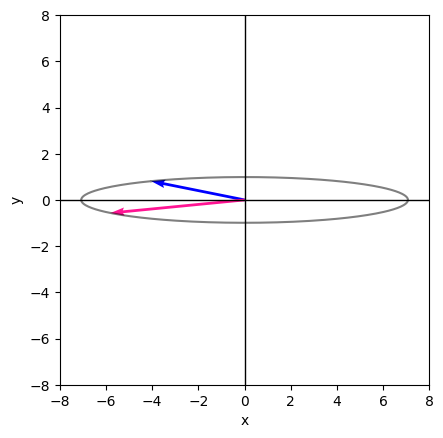

In [17]:
print('Scaling by D:')
scaling_matrix = np.diag(D) @ Vt
plot_transformed_circle_and_vectors(scaling_matrix, xlim=(-8, 8), ylim=(-8, 8))
plt.show()

2nd rotation by U (final transformation by A):


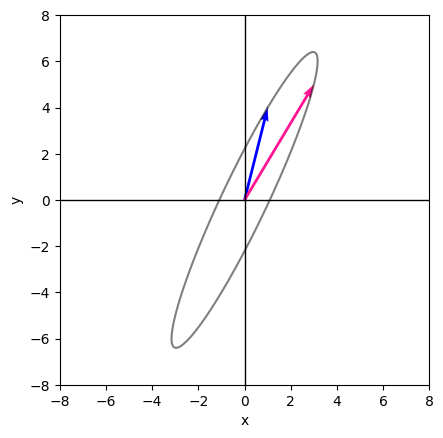

In [19]:
print('2nd rotation by U (final transformation by A):')
final_transformation = U @ np.diag(D) @ Vt
plot_transformed_circle_and_vectors(final_transformation, xlim=(-8, 8), ylim=(-8, 8))
plt.show()